In [3]:
!pip install imblearn
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import os
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE
from collections import Counter

In [4]:
#reads in the df and removes the rows that do not have a good/bad classification
df = pd.read_csv(r"C:\Users\karsa\My Drive\Extracurriculars\Research\Audax Labs\compiled.csv", low_memory=False)
df = df[(df["Good/Bad"] == -1) | (df["Good/Bad"] == 1)]
df.shape

(1537, 629)

In [5]:
df = df.dropna(axis=1, thresh=1500);
df.shape

(1537, 532)

In [6]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols[:-1].tolist()

In [7]:
#imputes the missing values
imp = SimpleImputer(strategy='mean')
df[numeric_cols] = imp.fit_transform(df[numeric_cols])

In [79]:
#remove all columns which only have zeros
cols = []
for col in df.columns:
    if (df[col] == 0).all():
        cols.append(col)

if cols:
    df.drop(columns=cols, inplace=True)
    print(len(cols))

In [8]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5', 'Sensor-6',
       'Sensor-7', 'Sensor-8', 'Sensor-9', 'Sensor-10',
       ...
       'Sensor-577', 'Sensor-578', 'Sensor-583', 'Sensor-584', 'Sensor-585',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=528)
Categorical Columns: Index(['Unnamed: 0', 'Sensor-332', 'Sensor-576', 'Sensor-586'], dtype='object')


In [33]:
df[categorical_columns].describe()

,Unnamed: 0,Sensor-332,Sensor-576,Sensor-586
count,1537,1533,1537,1536
unique,1537,309,584,1473
top,Wafer-501,0.1017,0.0862,2.7619
freq,1,26,18,3


In [13]:
df.iloc[:, -1:].value_counts()
#df = df.dropna(subset=[df.columns[-1]])
#df.shape

Good/Bad
-1.0        1448
 1.0          89
dtype: int64

In [27]:
#sets the X and Y
X = df[numeric_cols].iloc[:, :-1]
#X = df.iloc[:, :-1]
Y = df.iloc[:, -1:]
X.shape

(1537, 526)

In [28]:
y = Y.to_numpy().flatten()

In [29]:
#train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [30]:
#SMOTE Balancing
counter = Counter(y_train)
print('Before', counter)
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
counter = Counter(y_train)
print('After', counter)

Before Counter({-1.0: 866, 1.0: 56})
After Counter({-1.0: 866, 1.0: 866})


In [31]:
#running Naive Baiyes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

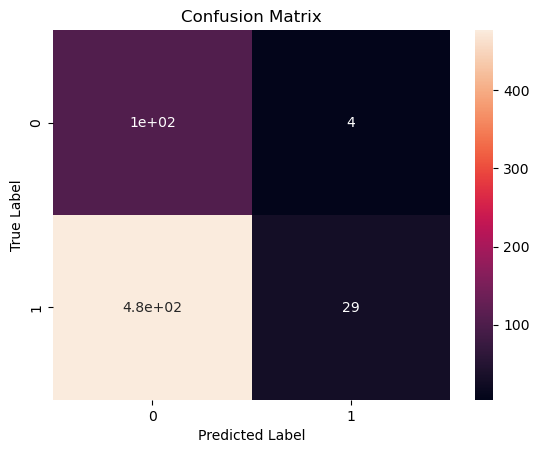

In [92]:
#confusion matrix
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [94]:
#getting the top 90* columns based on correlation
f_values, p_values = f_classif(X, y)

feature_names = X.columns
feature_f_values = dict(zip(feature_names, f_values))
feature_f_values = {key: value for key, value in feature_f_values.items() if value == value}
sorted_features = sorted(feature_f_values.items(), key=lambda x: x[1], reverse=True)

sorted_features = sorted_features[:90]
high_corr_columns = [element[0] for element in sorted_features]
high_corr_columns[:5]

C:\Users\karsa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 5 41 48 67] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\karsa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['Sensor-349', 'Sensor-104', 'Sensor-511', 'Sensor-60', 'Sensor-130']

In [96]:
#creating the new df
df = df[high_corr_columns]
df["Good/Bad"] = Y 
df.shape

(1537, 91)

In [97]:
df.to_csv(r"C:\Users\karsa\Downloads\audax labs files\Training_Batch_Files\preprocessed.csv", encoding='utf-8', index=False)